# Tesla Vs Nio

In [1]:
#Import libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import datetime
from dateutil import parser
from pandas.plotting import scatter_matrix


In [2]:
#Specifying time frame
start=datetime.datetime(2019,1,1)
end=datetime.datetime(2022,1,1)

Data Cleaning and Exploration

In [3]:
#Reading csv file: Tesla
tesla_file="TSLA (1).csv"
tesla_data=pd.read_csv(tesla_file)
tesla_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/07/2010,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
1,02/07/2010,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2,06/07/2010,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
3,07/07/2010,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
4,08/07/2010,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2838,08/10/2021,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2839,11/10/2021,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2840,12/10/2021,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2841,13/10/2021,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


In [4]:
#Reading csv file: NIO
nio_file="NIO.csv"
nio_data=pd.read_csv(nio_file)
nio_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-20,7.65,7.91,7.15,7.67,7.67,26923200
1,2018-11-21,7.90,8.05,7.63,7.71,7.71,13993600
2,2018-11-23,7.68,7.70,7.41,7.46,7.46,8119700
3,2018-11-26,7.61,7.63,7.16,7.37,7.37,12164900
4,2018-11-27,7.30,7.70,7.23,7.48,7.48,9084900


In [5]:
#Date conversion for NIO
nio_data["Date"] =nio_data["Date"].apply(parser.parse)
nio_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-20,7.650000,7.910000,7.150000,7.670000,7.670000,26923200
1,2018-11-21,7.900000,8.050000,7.630000,7.710000,7.710000,13993600
2,2018-11-23,7.680000,7.700000,7.410000,7.460000,7.460000,8119700
3,2018-11-26,7.610000,7.630000,7.160000,7.370000,7.370000,12164900
4,2018-11-27,7.300000,7.700000,7.230000,7.480000,7.480000,9084900
...,...,...,...,...,...,...,...
733,2021-10-20,39.970001,40.340000,39.160000,39.779999,39.779999,25120700
734,2021-10-21,39.509998,40.599998,39.369999,39.970001,39.970001,25389100
735,2021-10-22,39.959999,40.389999,38.540001,38.880001,38.880001,27962900
736,2021-10-25,39.400002,41.419998,39.240002,41.270000,41.270000,46935600


In [6]:
#Date conversion for Tesla
tesla_data["Date"]=tesla_data["Date"].apply(parser.parse)
tesla_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-07,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
1,2010-02-07,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2,2010-06-07,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
3,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
4,2010-08-07,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2838,2021-08-10,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2839,2021-11-10,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2840,2021-12-10,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2841,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


In [7]:
#Merging the dataframes 
merged_data=pd.merge(tesla_data,nio_data,on="Date",suffixes=("_Tesla","_NIO"))
merged_data

,Date,Open_Tesla,High_Tesla,Low_Tesla,Close_Tesla,Adj Close_Tesla,Volume_Tesla,Open_NIO,High_NIO,Low_NIO,Close_NIO,Adj Close_NIO,Volume_NIO
0,2018-12-03,65.722000,69.442001,65.300003,69.101997,69.101997,41320000,8.100000,8.130000,7.500000,7.580000,7.580000,22425400
1,2018-12-04,60.464001,60.790001,58.736000,58.816002,58.816002,38044000,7.600000,7.640000,7.050000,7.080000,7.080000,19624700
2,2018-12-06,68.940002,70.994003,67.599998,68.554001,68.554001,111737000,6.860000,7.370000,6.720000,7.370000,7.370000,16688100
3,2018-12-07,64.286003,64.646004,62.554001,63.341999,63.341999,28606000,7.360000,7.380000,6.960000,6.990000,6.990000,11576200
4,2018-12-10,52.200001,52.397999,50.402000,51.756001,51.756001,36007000,7.030000,7.120000,6.740000,7.030000,7.030000,9981000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2021-05-10,784.799988,797.309998,774.200012,780.590027,780.590027,18432600,36.779999,36.790001,34.299999,34.330002,34.330002,92293900
632,2021-06-10,776.200012,786.659973,773.219971,782.750000,782.750000,14632800,42.669998,43.430000,42.160000,42.759998,42.759998,34757300
633,2021-08-10,796.210022,796.380005,780.909973,785.489990,785.489990,16711100,45.470001,46.380001,44.099998,44.220001,44.220001,29572800
634,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100,35.779999,36.680000,35.470001,36.240002,36.240002,33439600


In [8]:
#Setting the date as index
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

merged_data.set_index('Date', inplace = True)

In [9]:
#Rounding the figures
clean_df=merged_data.round(decimals=3)
# clean_df.head()
clean_df.sort_values(["Open_Tesla","Open_NIO"])

,Open_Tesla,High_Tesla,Low_Tesla,Close_Tesla,Adj Close_Tesla,Volume_Tesla,Open_NIO,High_NIO,Low_NIO,Close_NIO,Adj Close_NIO,Volume_NIO
Date,,,,,,,,,,,,
2019-05-31,37.020,37.984,36.820,37.032,37.032,52033500,3.07,3.15,3.00,3.05,3.05,39383300
2019-03-06,37.102,37.336,35.398,35.794,35.794,65322000,8.26,8.72,8.00,8.01,8.01,73522700
2019-05-29,37.420,38.478,37.008,37.972,37.972,59843000,3.89,3.90,3.60,3.61,3.61,41690400
2019-05-30,37.750,38.452,37.404,37.644,37.644,39632500,3.55,3.55,3.11,3.24,3.24,55942200
2019-05-28,38.240,39.000,37.570,37.740,37.740,51564500,4.12,4.14,3.88,4.00,4.00,114474400
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-20,858.740,859.500,837.280,850.450,850.450,25665900,59.85,60.09,56.19,57.71,57.71,94983600
2021-08-02,869.670,877.770,854.750,863.420,863.420,20161700,44.65,46.78,44.30,45.85,45.85,68453300
2021-01-27,870.350,891.500,858.660,864.160,864.160,27334000,57.95,59.79,56.60,57.15,57.15,73078300


Stock Price Analysis

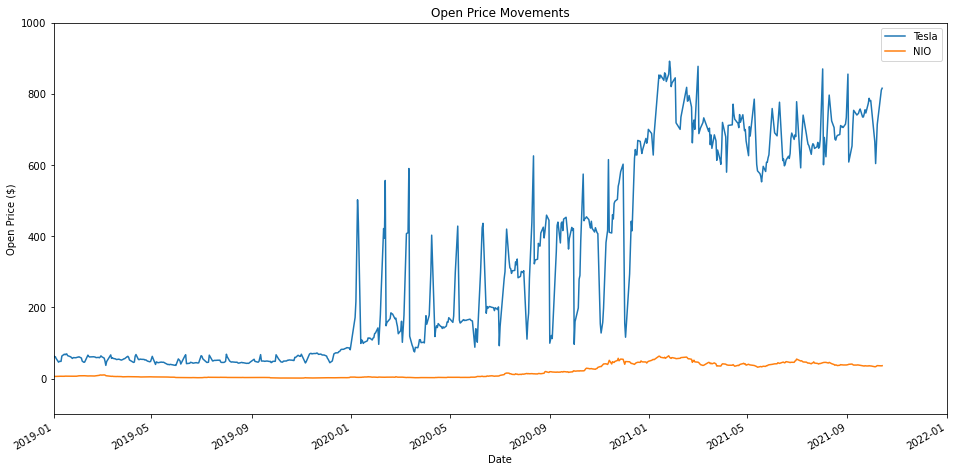

In [10]:
#Plotting based on Open price 
clean_df["Open_Tesla"].plot(label="Tesla",figsize=(16,8),title="Open Price Movements")
clean_df["Open_NIO"].plot(label="NIO")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Open Price ($)")


plt.xlim(("2019","2022"))
plt.ylim(-100,1000)
plt.show()

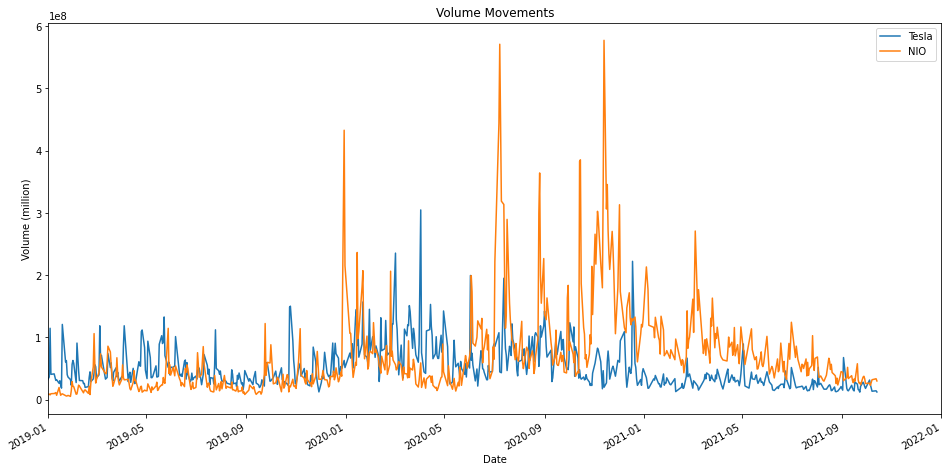

In [11]:
#Plotting based on Volume
clean_df["Volume_Tesla"].plot(label="Tesla",figsize=(16,8),title="Volume Movements")
clean_df["Volume_NIO"].plot(label="NIO")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Volume (million)")

plt.xlim(("2019-01-01","2022-01-01"))

plt.show()

In [12]:
#Determine hgihest volume trade 
telsa_vol=clean_df["Volume_Tesla"].idxmax()
tesla_max=clean_df["Volume_Tesla"].max()
nio_vol=clean_df["Volume_NIO"].idxmax()
nio_max=clean_df["Volume_NIO"].max()

print(f"Highest volume traded for Tesla of {tesla_max} on date: {telsa_vol}")
print(f"Highest volume traded for NIO of {nio_max} on date: {nio_vol}")

Highest volume traded for Tesla of 304694000 on date: 2020-04-02 00:00:00
Highest volume traded for NIO of 577185100 on date: 2020-11-13 00:00:00


In [13]:
#Determining a correlation
car_co=pd.concat([clean_df["Open_Tesla"],clean_df["Open_NIO"]],axis=1)
car_co.columns=["Tesla Open","NIO Open"]

,Tesla Open,NIO Open
Date,,
2018-12-03,65.722,8.10
2018-12-04,60.464,7.60
2018-12-06,68.940,6.86
2018-12-07,64.286,7.36
2018-12-10,52.200,7.03
...,...,...
2021-05-10,784.800,36.78
2021-06-10,776.200,42.67
2021-08-10,796.210,45.47


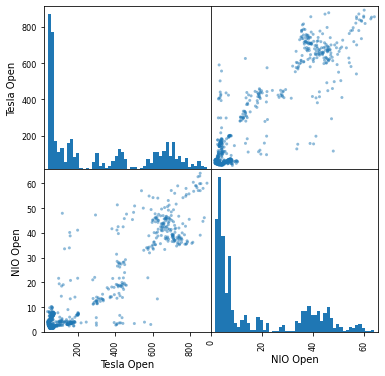

In [14]:
scatter_matrix(car_co,figsize=(6,6),hist_kwds={"bins":50})
car_co

In [15]:
correlation=sts.pearsonr(clean_df["Open_Tesla"],clean_df["Open_NIO"])
print(f"The correlation value between Tesla and NIO open prices is {correlation[0]}")

The correlation value between Tesla and NIO open prices is 0.9115463671593006


In [16]:
#Calculating daily Percentage Change

#Return(t)=(p(t)/p(t-1))-1

clean_df["Return_Tesla"]=(clean_df["Close_Tesla"]/clean_df["Close_Tesla"].shift(1))-1
clean_df["Return_NIO"]=(clean_df["Close_NIO"]/clean_df["Close_NIO"].shift(1))-1
clean_df[['Return_Tesla','Return_NIO']]

,Return_Tesla,Return_NIO
Date,,
2018-12-03,NaN,NaN
2018-12-04,-0.148852,-0.065963
2018-12-06,0.165567,0.040960
2018-12-07,-0.076028,-0.051560
2018-12-10,-0.182912,0.005722
...,...,...
2021-05-10,0.006589,-0.036486
2021-06-10,0.002767,0.245558
2021-08-10,0.003500,0.034144


In [17]:
clean_df["Return_NIO"].max()
clean_df["Return_Tesla"].max()

0.28016075430867926

(-3.0, 8.0)

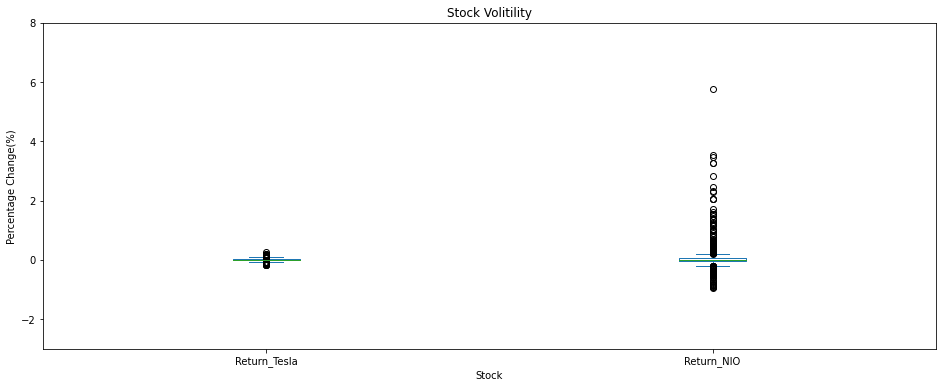

In [19]:
#Boxplots
boxplot_df=pd.concat([clean_df["Return_Tesla"],clean_df["Return_NIO"]],axis=1)
boxplot_df.plot(kind="box",figsize=(16,6))

plt.title("Stock Volitility")
plt.ylabel("Percentage Change(%)")
plt.xlabel("Stock")

plt.ylim(-3,8)